In [12]:
import torch
import numpy as np

Tensory w PyTorchu to specjalne struktury danych które przypominają tablice/macierze. Używamy ich do przechowywania wejśc/wyjść z sieci jak również wag modelu.
Tensory przypominają swoją budową tablice numpy https://numpy.org/, z zasadniczą różnicą ktorą jest łatwa możliwość przechowywania i operowania na tensorach na kartach graficznych 

Tensory mogą być tworzone w różny sposób:
1. Ze standardowych tablic

In [13]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

2. Na poodstawie tablic numpy

In [14]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

3. Na podstawie innych tensorów

In [15]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9018, 0.6024],
        [0.3338, 0.4811]]) 



4. Z losowymi lub stałymi wartościami

In [16]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
print(f"Random Tensor: \n {rand_tensor} \n")
ones_tensor = torch.ones(shape)
print(f"Ones Tensor: \n {ones_tensor} \n")
zeros_tensor = torch.zeros(shape)
print(f"Zeros Tensor: \n {zeros_tensor} \n")

Random Tensor: 
 tensor([[0.9891, 0.4228, 0.8491],
        [0.8191, 0.1730, 0.9712]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



### Atrybuty tensorów

In [17]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Operacje na tensorach

Nie ma co się bać dokumentacji! (Jest bardzo przyjemnie napisana) Wszystkie operacje na tensorach są opisane tutaj: https://pytorch.org/docs/stable/torch.html
Standardowo operacje są uruchamiane na CPU, ale można przenosić tensory, całe modele i **wszystkie operacje** na GPU (co zazwyczaj jest szybsze) za pomocą prostej komendy. Przetestujemy to w kolejnych częściach laboratorium

#### Standardowe indeksowanie i slicing

In [18]:
tensor = torch.rand(4, 4)
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[:, -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([0.2328, 0.7064, 0.1228, 0.7154])
First column:  tensor([0.2328, 0.9700, 0.8813, 0.1769])
Last column: tensor([0.7154, 0.4296, 0.0139, 0.3158])
tensor([[0.2328, 0.0000, 0.1228, 0.7154],
        [0.9700, 0.0000, 0.4323, 0.4296],
        [0.8813, 0.0000, 0.4237, 0.0139],
        [0.1769, 0.0000, 0.3918, 0.3158]])


#### Transponowanie tensorów

In [19]:
tensor = torch.ones(4, 3)
tensor[:,1] = 0
tensor[:,2] = 2
tensor[3,:] = 3
print(tensor)
print(f"Tensor shape:{tensor.shape}\n")
tensor2 = tensor.T
print(tensor2)
print(f"Transposed tensor shape:{tensor2.shape}")

tensor([[1., 0., 2.],
        [1., 0., 2.],
        [1., 0., 2.],
        [3., 3., 3.]])
Tensor shape:torch.Size([4, 3])

tensor([[1., 1., 1., 3.],
        [0., 0., 0., 3.],
        [2., 2., 2., 3.]])
Transposed tensor shape:torch.Size([3, 4])


#### Zmiana wymiarów

In [20]:
tensor = torch.arange(10)
print(tensor)
print(f"Tensor shape:{tensor.shape}\n")

tensor2 = tensor.unsqueeze(dim=0)
print(tensor2)
print(f"Tensor shape:{tensor2.shape}\n")

tensor3 = tensor.unsqueeze(dim=1)
print(tensor3)
print(f"Tensor shape:{tensor3.shape}\n")

tensor4 = tensor.view(5,2)
print(tensor4)
print(f"Tensor shape:{tensor4.shape}\n")

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Tensor shape:torch.Size([10])

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
Tensor shape:torch.Size([1, 10])

tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])
Tensor shape:torch.Size([10, 1])

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])
Tensor shape:torch.Size([5, 2])



#### Łączenie tensorów

In [21]:
tensor = torch.ones(4, 3)
tensor[:,1] = 0
tensor[:,2] = 2
tensor[3,:] = 3
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 2., 1., 0., 2., 1., 0., 2.],
        [1., 0., 2., 1., 0., 2., 1., 0., 2.],
        [1., 0., 2., 1., 0., 2., 1., 0., 2.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3.]])


In [22]:
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)

tensor([[1., 0., 2.],
        [1., 0., 2.],
        [1., 0., 2.],
        [3., 3., 3.],
        [1., 0., 2.],
        [1., 0., 2.],
        [1., 0., 2.],
        [3., 3., 3.],
        [1., 0., 2.],
        [1., 0., 2.],
        [1., 0., 2.],
        [3., 3., 3.]])


In [23]:
t1 = torch.stack([tensor, tensor, tensor])
print(t1)

tensor([[[1., 0., 2.],
         [1., 0., 2.],
         [1., 0., 2.],
         [3., 3., 3.]],

        [[1., 0., 2.],
         [1., 0., 2.],
         [1., 0., 2.],
         [3., 3., 3.]],

        [[1., 0., 2.],
         [1., 0., 2.],
         [1., 0., 2.],
         [3., 3., 3.]]])


In [24]:
tensor = torch.rand(5,4)
t1 = torch.stack([tensor, tensor, tensor],dim=0)
print(t1.shape)
t1 = torch.stack([tensor, tensor, tensor],dim=1)
print(t1.shape)
t1 = torch.stack([tensor, tensor, tensor],dim=2)
print(t1.shape)

torch.Size([3, 5, 4])
torch.Size([5, 3, 4])
torch.Size([5, 4, 3])


In [26]:
t1 = torch.stack([tensor, tensor, tensor],dim=3)
print(t1.shape)

IndexError: Dimension out of range (expected to be in range of [-3, 2], but got 3)

#### Operacje arytmetyczne

In [27]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
tensor[:,2] = 2
tensor[3,:] = 3

print(tensor)
print(tensor+2)
print(tensor*5)

tensor([[1., 0., 2., 1.],
        [1., 0., 2., 1.],
        [1., 0., 2., 1.],
        [3., 3., 3., 3.]])
tensor([[3., 2., 4., 3.],
        [3., 2., 4., 3.],
        [3., 2., 4., 3.],
        [5., 5., 5., 5.]])
tensor([[ 5.,  0., 10.,  5.],
        [ 5.,  0., 10.,  5.],
        [ 5.,  0., 10.,  5.],
        [15., 15., 15., 15.]])


#### Operacje na elementach

In [ ]:
tensor * tensor

In [ ]:
tensor + tensor

In [ ]:
rand_tensor = torch.rand(4,4)*10
print(rand_tensor)
print(rand_tensor / tensor)

In [ ]:
rand_tensor = torch.rand(4,4)*10
print(rand_tensor // tensor)
print((tensor / tensor).type())

### Mini zadanie na plusa, mozna wysłać po zajęciach

Stwórz macierz dwuwymiarową której wartości będą kolejnymi numerami od 1 do zadanej liczby x. Nie uzywaj pętli.

Hint: https://pytorch.org/docs/stable/torch.html

### Operacje macierzowe

In [ ]:
tensor = torch.ones(4, 3)
tensor[1,:] = 0
print(tensor)
print(tensor.T)

In [ ]:
y1 = tensor.matmul(tensor.T)
print(y1,"\n")
y2 = tensor @ tensor.T
print(y2)

### Zaawansowany przykład - regresja

Dla wszystkich którzy potrzebują powtórki z matmy: https://mml-book.github.io/

In [ ]:
apples_kg_ordered = [2,4,7,3,13]
plums_kg_ordered = [3,8,9,1,1]
prices = [11.97 , 28.05, 38.98, 10.96, 41.1]

In [ ]:
X = torch.tensor([apples_kg_ordered,plums_kg_ordered])
Y = torch.tensor(prices)
print(X)
print(Y)

In [ ]:
X = X.T.float()
X

In [ ]:
theta = torch.inverse((X.T@X))@X.T@Y
theta 

In [ ]:
X @ theta

# Automatyczne obliczanie gradientu

Do automatycznego obliczania gradientu służy wbudowany pakiet torch.autograd, który umożliwia automatyczne obliczanie gradientu dla dowolnego grafu (ciągu obliczeń)

In [7]:
x = torch.ones(5, requires_grad=True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


In [8]:
y = x + 2
y

tensor([3., 3., 3., 3., 3.], grad_fn=<AddBackward0>)

In [9]:
y = x * 2
y

tensor([2., 2., 2., 2., 2.], grad_fn=<MulBackward0>)

In [10]:
y = x @ x.T
y

C:\Users\mateu\AppData\Local\Temp\ipykernel_15296\3369123323.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:3729.)
  y = x @ x.T


tensor(5., grad_fn=<DotBackward0>)

In [ ]:
y = x - 2
y

In [ ]:
y.grad_fn.next_functions[0][0]

In [ ]:
y.grad_fn.next_functions[0][0].variable

In [ ]:
z = y * y * 3

In [ ]:
a = z.mean()
print(z)
print(a)

In [ ]:
from torchviz import make_dot

In [ ]:
make_dot(a)

### Gradienty

In [ ]:
x = torch.ones(1, requires_grad=True)
print(x)
y = (x+4)**3
y

In [ ]:
make_dot(y)

In [ ]:
y.backward()
x.grad

#### Obliczenia z pominięciem gradientów

In [ ]:
t1 = torch.rand(3,4, requires_grad=True)
t2 = torch.rand(4,3, requires_grad=True)
with torch.no_grad():
    y = t1@t2
print(y)
print(t1@t2)

#### Funkcja backward pozwala nam policzyć pochodną cząstkową w punkcie dla wszystkich źródeł (liści w grafie obliczeń)

In [ ]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output

In [ ]:
w = torch.randn(5, 3, requires_grad=True) #weights
b = torch.randn(3, requires_grad=True) #bias

In [ ]:
z = torch.matmul(x, w)+b

In [ ]:
loss = torch.abs((z-y)).mean()
loss

In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

# Regresja raz jeszcze

In [ ]:
apples_kg_ordered = [2,4,7,3,13]
plums_kg_ordered = [3,8,9,1,1]
prices = [11.97 , 28.05, 38.98, 10.96, 41.1]

In [ ]:
X = torch.tensor([apples_kg_ordered,plums_kg_ordered])
y = torch.tensor(prices)
X = X.T.float()
Y = Y.T
print(X)
print(Y)

In [ ]:
params = torch.rand(2,requires_grad=True)

In [ ]:
y_pred = X@params
y_pred

In [ ]:
loss = (torch.square(Y-y_pred)).mean()
loss

In [ ]:
loss.backward()

In [ ]:
params.grad

In [ ]:
lr = 0.001

In [ ]:
print(params)
params - lr *params.grad

In [ ]:
params = torch.rand(2,requires_grad=True)

In [ ]:
for epoch in range(50):
    y_pred = X@params
    loss = (torch.square(Y-y_pred)).mean()
    loss.backward()
    with torch.no_grad():
        params.copy_(params - lr *params.grad)
    print(params)
    print(params.grad)
    params.grad.zero_()

### Mini zadanie na plusa, mozna wyslać po zajęciach.
Tym razem na innym targu do ceny owoców doliczany jest stały koszt reklamówki. Napisz model regresji liniowej który oszacuje cenę kg ziemniaków, pomidorów i reklamówki

In [16]:
potatoes_kg_ordered = [1,3,7,3,10,6,8,4,3,1,2,0]
tomatoes_kg_ordered = [5,2,3,1,2,3,6,7,3,2,3,1]
prices = [22.37 , 14.45, 26.6, 10.44, 28.49, 24.52, 40.38, 36.51, 18.50, 10.46, 16.51, 4.58]

In [17]:
X = torch.tensor([potatoes_kg_ordered,tomatoes_kg_ordered, np.ones_like(potatoes_kg_ordered)])
Y = torch.tensor(prices)
X = X.T.float()
Y = Y.T
print(X)
print(Y)

tensor([[ 1.,  5.,  1.],
        [ 3.,  2.,  1.],
        [ 7.,  3.,  1.],
        [ 3.,  1.,  1.],
        [10.,  2.,  1.],
        [ 6.,  3.,  1.],
        [ 8.,  6.,  1.],
        [ 4.,  7.,  1.],
        [ 3.,  3.,  1.],
        [ 1.,  2.,  1.],
        [ 2.,  3.,  1.],
        [ 0.,  1.,  1.]])
tensor([22.3700, 14.4500, 26.6000, 10.4400, 28.4900, 24.5200, 40.3800, 36.5100,
        18.5000, 10.4600, 16.5100,  4.5800])


#### Końcowy wynik:

In [32]:
params = torch.rand(3, requires_grad=True)

for epoch in range(500):
    y_pred = X@params
    loss = (torch.square(Y-y_pred)).mean()
    loss.backward()
    with torch.no_grad():
        params.copy_(params-0.001*params.grad)
        print(params)
        print(params.grad)
        params.grad.zero_()

tensor([0.4372, 0.7319, 0.0567], requires_grad=True)
tensor([-184.8786, -142.1502,  -36.5079])
tensor([0.6086, 0.8649, 0.0907], requires_grad=True)
tensor([-171.4714, -133.0134,  -34.0555])
tensor([0.7676, 0.9895, 0.1225], requires_grad=True)
tensor([-159.0025, -124.5066,  -31.7732])
tensor([0.9150, 1.1060, 0.1521], requires_grad=True)
tensor([-147.4065, -116.5862,  -29.6491])
tensor([1.0517, 1.2153, 0.1798], requires_grad=True)
tensor([-136.6225, -109.2112,  -27.6722])
tensor([1.1782, 1.3176, 0.2057], requires_grad=True)
tensor([-126.5941, -102.3437,  -25.8322])
tensor([1.2955, 1.4135, 0.2298], requires_grad=True)
tensor([-117.2684,  -95.9485,  -24.1196])
tensor([1.4041, 1.5035, 0.2523], requires_grad=True)
tensor([-108.5965,  -89.9927,  -22.5256])
tensor([1.5046, 1.5880, 0.2733], requires_grad=True)
tensor([-100.5329,  -84.4457,  -21.0418])
tensor([1.5977, 1.6673, 0.2930], requires_grad=True)
tensor([-93.0351, -79.2792, -19.6606])
tensor([1.6837, 1.7417, 0.3114], requires_grad=True)


In [33]:
#GT Rozwiazanie - jak je znaleźć?
np.array(potatoes_kg_ordered)*2 + np.array(tomatoes_kg_ordered)*4 + 0.5

array([22.5, 14.5, 26.5, 10.5, 28.5, 24.5, 40.5, 36.5, 18.5, 10.5, 16.5,
        4.5])

In [35]:
prices_pred = X@params
print(f'{prices_pred}')

tensor([22.3613, 14.5699, 26.5379, 10.6341, 28.6262, 24.5299, 40.3533, 36.2570,
        18.5057, 10.5539, 16.4977,  4.6100], grad_fn=<MvBackward0>)


# LAB 2 - Tworzenie architektury i przygotowanie danych

In [36]:
import torch
import numpy as np
import time
import math
import matplotlib.pyplot as plt

## GPU

Jednym z kluczowych udogodnień pytorcha jest możliwość szybkiego i prostego przenoszenia obliczeń między CPU a GPU

In [37]:
torch.cuda.is_available()

True

In [40]:
device = torch.device("cuda") 
device

device(type='cuda')

In [39]:
x = torch.zeros(2, 3)
print("X", x)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]])
X tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


#### Co nam to daje?

In [6]:
x = torch.randn(5000, 5000)

## CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

## GPU version
x = x.to(device)
# The first operation on a CUDA device can be slow as it has to establish a CPU-GPU communication first. 
# Hence, we run an arbitrary command first without timing it for a fair comparison.
_ = torch.matmul(x*0.0, x)
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"GPU time: {(end_time - start_time):6.5f}s")

CPU time: 0.18913s
GPU time: 0.00015s


#### Ciąg komend do zapisania
Losowość jest bardzo ważnym elementem trenowania sieci neuronowych (o czym się wkrótce przekonamy). Eksperymentując, chcielibyśmy jednak żeby przy każdym uruchomieniu programu, wynik był taki sam. Tylko w takim przypadku jesteśmy w stanie coś wnioskować. Do zapewnienia możliwości reprodukcji wyników na GPU za pomocą pytorcha służa poniższe komendy:

In [40]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available(): 
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)
    
# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

## Tworzenie modeli
Tworzymy tensory z parametrami, wagi i biasy, obliczamy gradienty, aktualizujemy parametry itd.
lub
wykorzystujemy torch.nn

W torch.nn możemy znaleźć wiele przydatnych predefiniowanych klas jak wagi sieci, funkcje aktywacji, funkcje straty, optymalizacja itp. Jeszcze raz, dokumentacja jest fajna: https://pytorch.org/docs/stable/nn.html

In [31]:
import torch.nn as nn

Dodatkowo, funkcje wykorzystywane w budowaniu sieci znajdują się w module torch.nn.functionl

In [30]:
import torch.nn.functional as F

### nn.Module
W PyTorchu, sieci neuronowe są zbudowane z modułów - obiektów klas dziedziczących po klasie nn.Module. Moduły mogą składać się z innych modułów, a sieć neuronowa w całości też zazwyczaj jest modułem.

Podstawowy template dla modułu wygląda następująco

In [43]:
class MyModule(nn.Module):
    
    def __init__(self):
        super().__init__()
        # Some init for my module
        
    def forward(self, x):
        # Function for performing the calculation of the module.
        pass

W konstruktorze modułu zazwyczaj inicjowane są wszystkie parametry, lub wewnętrzne moduły (np. warstwy sieci)

W funkcji forward zapisane są wszystkie obliczenia które są wykonywane kiedy wywołujemy dany moduł. Przykładowo: (nn = MyModule(); nn(x)). 

Kalkulacja wstecz (backwards) jest tworzona automatycznie, ale w razie potrzeby można ją też nadpisywać 

# Stwórzmy pierwsza sieć neuronową 

In [44]:
class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)
#         self.linear3 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
#         x = self.act_fn(x)
#         x = self.linear3(x)
        return x

Wypisywanie zawartości modelu

In [45]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
model.cuda()
# Printing a module shows all its submodules
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


In [46]:
x = torch.Tensor(2).cuda()

In [47]:
model.forward(x)
model(x)

tensor([0.0265], device='cuda:0', grad_fn=<ViewBackward0>)

Co tak właściwie mamy w środku?

In [1]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

NameError: name 'model' is not defined

## Activation functions

In [49]:
act_fn_by_name = {
    "sigmoid": torch.sigmoid,
    "tanh": torch.tanh,
    "relu": F.relu,
    "leakyrelu": F.leaky_relu
}

In [50]:
def get_grads(act_fn, x):
    x = x.clone().requires_grad_() # Mark the input as tensor for which we want to store gradients
    out = act_fn(x)
    out.sum().backward() # Summing results in an equal gradient flow to each element in x
    return x.grad # Accessing the gradients of x by "x.grad"

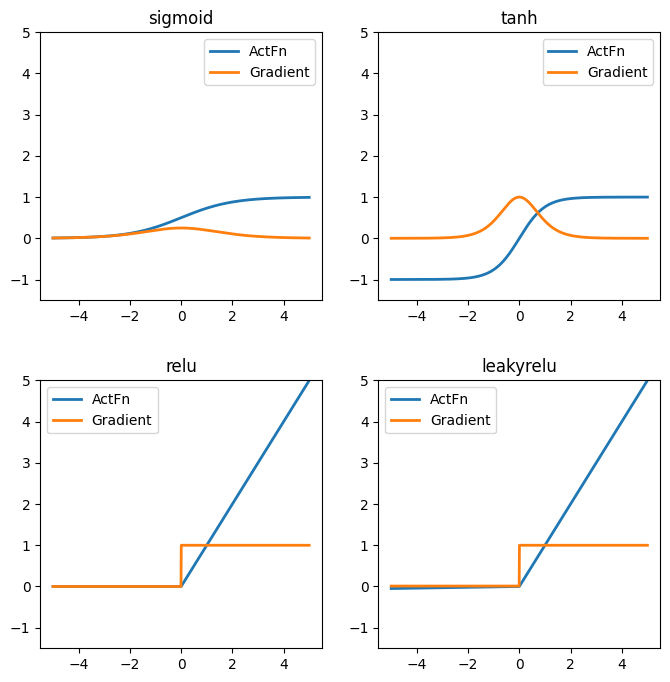

In [51]:
%matplotlib inline
def vis_act_fn(act_fn, name, ax, x):
    # Run activation function
    y = act_fn(x)
    y_grads = get_grads(act_fn, x)
    # Push x, y and gradients back to cpu for plotting
    x, y, y_grads = x.cpu().numpy(), y.cpu().numpy(), y_grads.cpu().numpy()
    ## Plotting
    ax.plot(x, y, linewidth=2, label="ActFn")
    ax.plot(x, y_grads, linewidth=2, label="Gradient")
    ax.set_title(name)
    ax.legend()
    ax.set_ylim(-1.5, x.max())

x = torch.linspace(-5, 5, 1000) # Range on which we want to visualize the activation functions
## Plotting
rows = math.ceil(len(act_fn_by_name)/2.0)
fig, ax = plt.subplots(rows, 2, figsize=(8, rows*4))
for i, name in enumerate(act_fn_by_name.keys()):
    vis_act_fn(act_fn_by_name[name], name, ax[divmod(i,2)], x)
fig.subplots_adjust(hspace=0.3)
plt.show()
plt.close()

# Dane
PyTorch posiada zaimplementowanych kilka funkcjonalności które pozwalają wczytywać i manipulować danymi. Znajdują się one w pakiecie torch.utils.data

In [52]:
import torch.utils.data as data

Główną strukturą w ramach której przechowywane (lub niekoniecznie) są dane jest klasa Dataset. Stwórzmy sobie przykładowy zbiór danych - tzw. ciągły XOR. Przykład zaczerpnięty z https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial2/Introduction_to_PyTorch.html#Learning-by-example:-Continuous-XOR

In [53]:
class XORDataset(data.Dataset):

    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [55]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([0.1745, 0.9018]), tensor(1))


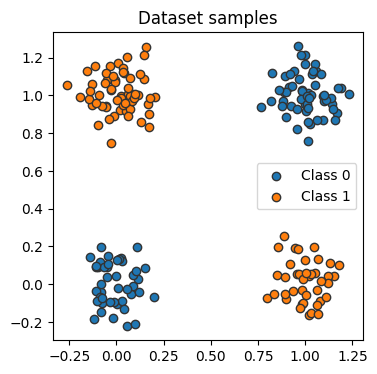

In [56]:
examples = dataset.data
labels = dataset.label
data_0 = examples[labels == 0]
data_1 = examples[labels == 1]

plt.figure(figsize=(4,4))
plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
plt.title("Dataset samples")
plt.legend()
plt.show()

## Data loaders (Ładowacze danych?!)

In [23]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

In [24]:
next(iter(data_loader))

[tensor([[-1.2925e-01, -4.6438e-02],
         [ 4.6635e-02, -5.4442e-02],
         [ 2.2401e-01,  9.8627e-01],
         [-8.2926e-03, -3.4543e-02],
         [ 1.2077e+00,  1.2643e-02],
         [-1.9780e-01, -2.6523e-02],
         [ 1.1510e-02,  3.6751e-04],
         [-4.2049e-02,  1.8635e-01]]),
 tensor([0, 0, 1, 0, 1, 0, 0, 0])]

In [25]:
len(data_loader)

25

In [26]:
next(iter(data_loader))[0].shape[0]*len(data_loader)

200

In [27]:
data_loader_2 = data.DataLoader(dataset, batch_size=7, shuffle=True)
next(iter(data_loader_2))[0].shape[0]*len(data_loader_2)

203

In [28]:
list(iter(data_loader_2))[-1]

[tensor([[-0.0461,  1.0639],
         [ 0.8945, -0.0986],
         [ 0.9505, -0.0785],
         [-0.0984,  0.0942]]),
 tensor([1, 1, 1, 0])]

#### Drop last
Parametr powodujący pominięcie ostatniego wsadu (batch)

In [29]:
data_loader_2 = data.DataLoader(dataset,batch_size=7, shuffle=True, drop_last=True)
next(iter(data_loader_2))[0].shape[0]*len(data_loader_2)

196

## Funkcje straty
Na poprzednich zajęciach obliczaliśmy funkcję straty ręcznie wykonując operacje na tensorach. Jest to w pełni poprawne rozwiązanie, ale możemy też nie wymyślać koła na nowo, ale wykorzystać wbudowane moduły. Pełna lista dostępna tutaj: https://pytorch.org/docs/stable/nn.html#loss-functions

In [57]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
tensor_1 = torch.arange(5)
tensor_2 = torch.ones(5)
print(tensor_1, tensor_2)

tensor([0, 1, 2, 3, 4]) tensor([1., 1., 1., 1., 1.])


### Błąd średniokwadratowy (Mean Squared Error) lub L2Loss

In [59]:
loss = nn.MSELoss()
loss(tensor_1,tensor_2)

tensor(3.)

$ \quad l_{n}=\left(x_{n}-y_{n}\right)^{2}$

In [60]:
loss = nn.MSELoss(reduction="none")
print(f"No reduction: {loss(tensor_1,tensor_2)}")
loss = nn.MSELoss(reduction="mean")
print(f"Mean: {loss(tensor_1,tensor_2)}")
loss = nn.MSELoss(reduction="sum")
print(f"Sum: {loss(tensor_1,tensor_2)}")

No reduction: tensor([1., 0., 1., 4., 9.])
Mean: 3.0
Sum: 15.0


In [61]:
F.mse_loss(tensor_1, tensor_2)

tensor(3.)

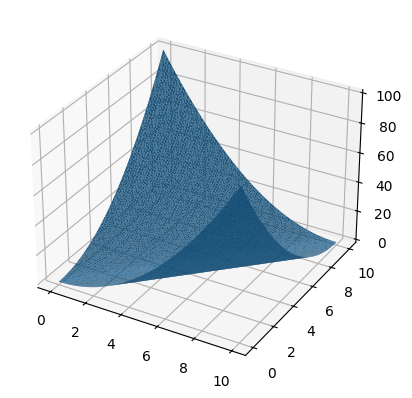

In [62]:
loss = nn.MSELoss(reduction="none")
x, y = torch.meshgrid(torch.linspace(0,10,100),torch.linspace(0,10,100), indexing='ij')
z = loss(x,y)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.plot_trisurf(x.numpy().flatten(), y.numpy().flatten(), z.numpy().flatten(), linewidth=0.2, antialiased=True)

plt.show()

### Błąd bezwzględny (Mean absolute Error) lub L1Loss

$ \quad l_{n}=\left|x_{n}-y_{n}\right|$

In [63]:
print(tensor_1, tensor_2)
loss = nn.L1Loss()
loss(tensor_1,tensor_2)

tensor([0, 1, 2, 3, 4]) tensor([1., 1., 1., 1., 1.])


tensor(1.4000)

In [38]:
loss = nn.L1Loss(reduction="none")
print(f"No reduction: {loss(tensor_1,tensor_2)}")
loss = nn.L1Loss(reduction="mean")
print(f"Mean: {loss(tensor_1,tensor_2)}")
loss = nn.L1Loss(reduction="sum")
print(f"Sum: {loss(tensor_1,tensor_2)}")

No reduction: tensor([1., 0., 1., 2., 3.])
Mean: 1.399999976158142
Sum: 7.0


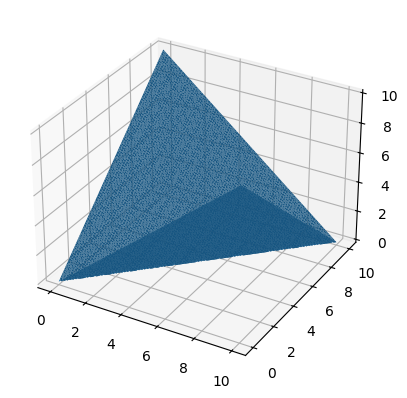

In [64]:
loss = nn.L1Loss(reduction="none")
x, y = torch.meshgrid(torch.linspace(0,10,100),torch.linspace(0,10,100), indexing='ij')
z = loss(x,y)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.plot_trisurf(x.numpy().flatten(), y.numpy().flatten(), z.numpy().flatten(), linewidth=0.2, antialiased=True)
    
plt.show()

### Entropia krzyżowa:
$l_{n}=\left[y_{n} \cdot \log x_{n}+\left(1-y_{n}\right) \cdot \log \left(1-x_{n}\right)\right]$

In [65]:
tensor_1 = torch.rand(5)
tensor_2 = torch.ones(5)
print(tensor_1, tensor_2)
loss = nn.BCELoss(reduction="none")
loss(tensor_1,tensor_2)

tensor([0.8339, 0.4615, 0.7916, 0.3703, 0.7472]) tensor([1., 1., 1., 1., 1.])


tensor([0.1816, 0.7733, 0.2336, 0.9935, 0.2914])

In [ ]:
loss(tensor_1*10,tensor_2)

In [136]:
loss = nn.BCEWithLogitsLoss(reduction="none")
loss(tensor_1*100,tensor_2)

tensor([6.0813e-37, 9.0581e-21, 4.1638e-35, 8.3003e-17, 3.5444e-33])

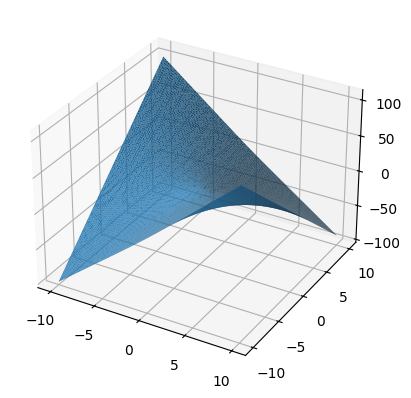

In [137]:
loss = nn.BCEWithLogitsLoss(reduction="none")
x, y = torch.meshgrid(torch.linspace(-10,10,100),torch.linspace(-10,10,100))
z = loss(x,y)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
#ax = fig.gca(projection='3d') - for older matplotlib

ax.plot_trisurf(x.numpy().flatten(), y.numpy().flatten(), z.numpy().flatten(), linewidth=0.2, antialiased=True)

plt.show()

# Optymalizacja parametrów
W przykładowym problemie optymalizacji parametrów regresji, ręcznie aktualizowaliśmy gradienty. W torch są do tego narzędzia zwane optymalizatorami, znajdują się one w pakiecie torch.optim

Najprostszym optymalizaotrem jest algorytm stochastycznego spadku gradientu (Stochastic Gradient Descent) - SGD

In [66]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

## Połączmy to wszystko razem

In [142]:
train_dataset = XORDataset(size=1000)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

In [143]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In [144]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [145]:
loss_module = nn.BCEWithLogitsLoss()

In [147]:
model.train() 

# Training loop
for epoch in range(100):
    for data_inputs, data_labels in train_data_loader:

        ## Step 1: Move input data to device (only strictly necessary if we use GPU)
        data_inputs = data_inputs.to(device)
        data_labels = data_labels.to(device)

        print(data_labels[0])

        ## Step 2: Run the model on the input data
        preds = model(data_inputs)

        print(preds[0])
        preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

        ## Step 3: Calculate the loss
        loss = loss_module(preds, data_labels.float())

        ## Step 4: Perform backpropagation
        # Before calculating the gradients, we need to ensure that they are all zero. 
        # The gradients would not be overwritten, but actually added to the existing ones.
        optimizer.zero_grad() 
        # Perform backpropagation
        loss.backward()

        ## Step 5: Update the parameters
        optimizer.step()
    print(f"Epoch: {epoch}, loss: {loss.item():.3}")

tensor(1, device='cuda:0')
tensor([1.4887], device='cuda:0', grad_fn=<SelectBackward0>)
tensor(0, device='cuda:0')
tensor([-0.9577], device='cuda:0', grad_fn=<SelectBackward0>)
tensor(1, device='cuda:0')
tensor([0.8321], device='cuda:0', grad_fn=<SelectBackward0>)
tensor(1, device='cuda:0')
tensor([0.7882], device='cuda:0', grad_fn=<SelectBackward0>)
tensor(1, device='cuda:0')
tensor([1.3000], device='cuda:0', grad_fn=<SelectBackward0>)
tensor(0, device='cuda:0')
tensor([-0.9115], device='cuda:0', grad_fn=<SelectBackward0>)
tensor(0, device='cuda:0')
tensor([-1.9498], device='cuda:0', grad_fn=<SelectBackward0>)
tensor(1, device='cuda:0')
tensor([1.0928], device='cuda:0', grad_fn=<SelectBackward0>)
Epoch: 0, loss: 0.277
tensor(0, device='cuda:0')
tensor([-2.0343], device='cuda:0', grad_fn=<SelectBackward0>)
tensor(0, device='cuda:0')
tensor([-2.0074], device='cuda:0', grad_fn=<SelectBackward0>)
tensor(0, device='cuda:0')
tensor([-0.3432], device='cuda:0', grad_fn=<SelectBackward0>)
tens

### Ewaluacja

In [72]:
test_dataset = XORDataset(size=500)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

In [74]:
model.eval() # Set model to eval mode
true_preds, num_preds = 0., 0.

with torch.no_grad(): # Deactivate gradients for the following code
    for data_inputs, data_labels in test_data_loader:

        # Determine prediction of model on dev set
        data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
        preds = model(data_inputs)
        preds = preds.squeeze(dim=1)
        preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
        pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1

        # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
        true_preds += (pred_labels == data_labels).sum()
        num_preds += data_labels.shape[0]

acc = true_preds / num_preds
print(f"Accuracy of the model: {100.0*acc:4.2f}%")

Accuracy of the model: 100.00%


In [76]:
from matplotlib.colors import to_rgba

C:\Users\mateu\Documents\GitHub\Python-Toolkit-Playground\.venv\Lib\site-packages\torch\functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:3638.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


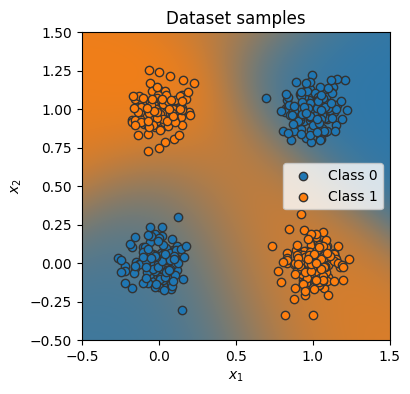

In [77]:
%matplotlib inline
with torch.no_grad():
    data = test_dataset.data.cpu().numpy()
    label = test_dataset.label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2) # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = preds * c0[None,None] + (1 - preds) * c1[None,None] # Specifying "None" in a dimension creates a new one
    output_image = output_image.cpu().numpy() # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='upper', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)

## Zapisywanie i wczytywanie modelu

In [ ]:
state_dict = model.state_dict()
print(state_dict)

In [ ]:
torch.save(state_dict, "simple_model.tar")

In [ ]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("simple_model.tar")

# Create a new model and load the state
new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1).to(device)
new_model.load_state_dict(state_dict)
# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

## Zrób to sam. Polecane przećwiczyć przed kolejnymi ćwiczeniami.

Spróbujmy przewidzieć ocenę wina na podstawie jego parametrów

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=";")

#### ... Jakieś wstępne przetwarzanie danych?

In [120]:
train=df.sample(frac=0.8,random_state=200) #random state is a seed value
test=df.drop(train.index)
train, val = train_test_split(train, test_size=0.2, random_state=200)
print(f"Train size: {train.shape}")
print(f"Validation size: {val.shape}")
print(f"Test size: {test.shape}")

Train size: (3134, 12)
Validation size: (784, 12)
Test size: (980, 12)


In [121]:
import torch.utils.data as data
from sklearn.preprocessing import StandardScaler
import numpy as np

In [124]:
train_data = train.values[:,:-1]
test_data = test.values[:,:-1]
val_data = val.values[:,:-1]

scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)  # Normalize training data
test_data = scaler.transform(test_data)
val_data = scaler.transform(val_data)

In [128]:
train_labels = np.zeros(shape=(train.shape[0], 10))
one_idx = np.array(train.values[:,-1], dtype=np.int64)
train_labels[np.arange(train.shape[0]),one_idx] = 1

train_dataset = data.TensorDataset(torch.from_numpy(train_data),torch.from_numpy(train_labels))
test_dataset = data.TensorDataset(torch.from_numpy(test_data),torch.from_numpy(test.values[:,-1]))
val_dataset = data.TensorDataset(torch.from_numpy(val_data),torch.from_numpy(val.values[:,-1]))

In [161]:
class MyClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden, dtype=torch.float64)
        self.act_fn = nn.ReLU()
        self.linear2 = nn.Linear(num_hidden, num_hidden//2, dtype=torch.float64)
        self.linear3 = nn.Linear(num_hidden//2, num_hidden//4, dtype=torch.float64)
        self.linear4 = nn.Linear(num_hidden//4, num_outputs, dtype=torch.float64)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        x = self.act_fn(x)
        x = self.linear3(x)
        x = self.act_fn(x)
        x = self.linear4(x)
        return x

In [162]:
model = MyClassifier(num_inputs=11, num_hidden=4096, num_outputs=10).cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00005)
loss_module = nn.CrossEntropyLoss()
train_data_loader = data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_data_loader = data.DataLoader(test_dataset, batch_size=64, shuffle=False, drop_last=False)
val_data_loader = data.DataLoader(val_dataset, batch_size=64, shuffle=False, drop_last=False)

In [163]:
model.train()

# Training loop
for epoch in range(91):
    true_preds, num_preds = 0., 0.
    for data_inputs, data_labels in train_data_loader:
        ## Step 1: Move input data to device (only strictly necessary if we use GPU)
        data_inputs = data_inputs.to(device, dtype=torch.float64)
        data_labels = data_labels.to(device)

        ## Step 2: Run the model on the input data
        preds = model(data_inputs)
        preds = preds.squeeze(dim=1)
        pred_labels = preds.argmax(dim=1)# Output is [Batch size, 1], but we want [Batch size]

        ## Step 3: Calculate the loss
        loss = loss_module(preds, data_labels.float())

        ## Step 4: Perform backpropagation
        # Before calculating the gradients, we need to ensure that they are all zero.
        # The gradients would not be overwritten, but actually added to the existing ones.
        optimizer.zero_grad()
        # Perform backpropagation
        loss.backward()

        ## Step 5: Update the parameters
        optimizer.step()

        true_preds += (pred_labels - data_labels.argmax(dim=1) == 0).sum()
        num_preds += data_labels.shape[0]
    acc = true_preds / num_preds
    print(f"Epoch: {epoch}, loss: {loss.item():.3}, train_accuracy: {100.0*acc:4.2f}%")

    if epoch % 10 == 0:
        model.eval()  # Set model to evaluation mode (disables dropout, batch norm updates)
        val_true_preds, val_num_preds = 0., 0.
        val_loss = 0.

        with torch.no_grad():  # No gradient calculations needed for validation
            for val_inputs, val_labels in val_data_loader:
                val_inputs = val_inputs.to(device, dtype=torch.float64)
                val_labels = val_labels.to(device, dtype=torch.long)

                val_preds = model(val_inputs)
                val_preds = val_preds.squeeze(dim=1)
                val_pred_labels = val_preds.argmax(dim=1)

                val_loss += loss_module(val_preds, val_labels)

                val_true_preds += (val_pred_labels == val_labels).sum().item()
                val_num_preds += val_labels.shape[0]

        val_acc = val_true_preds / val_num_preds * 100
        val_loss /= len(val_data_loader)  # Compute average validation loss

        print(f"Val Loss: {val_loss:.3f}, Val Acc: {val_acc:.2f}%")

        model.train()  # Switch back to training mode after validation


Epoch: 0, loss: 1.14, train_accuracy: 49.65%
Val Loss: 1.192, Val Acc: 51.40%
Epoch: 1, loss: 1.15, train_accuracy: 55.11%
Epoch: 2, loss: 1.05, train_accuracy: 57.02%
Epoch: 3, loss: 1.01, train_accuracy: 57.72%
Epoch: 4, loss: 0.93, train_accuracy: 58.10%
Epoch: 5, loss: 0.948, train_accuracy: 58.42%
Epoch: 6, loss: 0.79, train_accuracy: 59.06%
Epoch: 7, loss: 0.916, train_accuracy: 59.32%
Epoch: 8, loss: 0.897, train_accuracy: 60.24%
Epoch: 9, loss: 0.801, train_accuracy: 60.24%
Epoch: 10, loss: 0.945, train_accuracy: 60.63%
Val Loss: 1.074, Val Acc: 54.46%
Epoch: 11, loss: 0.829, train_accuracy: 62.16%
Epoch: 12, loss: 0.976, train_accuracy: 62.13%
Epoch: 13, loss: 0.909, train_accuracy: 63.24%
Epoch: 14, loss: 0.741, train_accuracy: 64.14%
Epoch: 15, loss: 0.889, train_accuracy: 64.90%
Epoch: 16, loss: 0.87, train_accuracy: 65.79%
Epoch: 17, loss: 1.06, train_accuracy: 66.27%
Epoch: 18, loss: 0.875, train_accuracy: 66.31%
Epoch: 19, loss: 0.849, train_accuracy: 67.26%
Epoch: 20, l

In [164]:
model.eval() # Set model to eval mode
true_preds, num_preds = 0., 0.

with torch.no_grad(): # Deactivate gradients for the following code
    for data_inputs, data_labels in test_data_loader:

        # Determine prediction of model on dev set
        data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
        preds = model(data_inputs)
        preds = preds.squeeze(dim=1)
        preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
        pred_labels = preds.argmax(dim=1)

        # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
        true_preds += (pred_labels == data_labels).sum()
        num_preds += data_labels.shape[0]

acc = true_preds / num_preds
print(f"Accuracy of the model: {100.0*acc:4.2f}%")

Accuracy of the model: 61.43%
